# 线性代数

In [1]:
import torch

In [2]:
X = torch.arange(24).reshape(2, 3, 4)  # 两个三行四列的矩阵
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [3]:
X.shape

torch.Size([2, 3, 4])

In [4]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A  # 如果只是赋值操作，则不分配新内存，只相当于一个索引
id(B) == id(A)

True

## 1.显式复制

In [5]:
B = A.clone()  # 显式地复制
id(B) == id(A)

False

In [6]:
A, B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

## 2.按元素乘

In [7]:
A * B  # 按元素乘

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

## 3.指定轴求和

In [8]:
A = torch.arange(40, dtype=torch.float32).reshape(2, 5, 4)
A

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]],

        [[20., 21., 22., 23.],
         [24., 25., 26., 27.],
         [28., 29., 30., 31.],
         [32., 33., 34., 35.],
         [36., 37., 38., 39.]]])

In [9]:
sum0 = A.sum(axis=0)
sum0, sum0.shape

(tensor([[20., 22., 24., 26.],
         [28., 30., 32., 34.],
         [36., 38., 40., 42.],
         [44., 46., 48., 50.],
         [52., 54., 56., 58.]]),
 torch.Size([5, 4]))

In [10]:
sum1 = A.sum(axis=1)
sum1, sum1.shape

(tensor([[ 40.,  45.,  50.,  55.],
         [140., 145., 150., 155.]]),
 torch.Size([2, 4]))

In [11]:
A.sum(axis=[0, 1]).shape

torch.Size([4])

In [12]:
A.sum().shape

torch.Size([])

## 4.平均值

In [14]:
A.mean(), A.sum() / A.numel()

(tensor(19.5000), tensor(19.5000))

In [15]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]),
 tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]))

In [16]:
sumA = A.sum(axis=1, keepdims=True)  # 保持维度不变
sumA.shape

torch.Size([2, 1, 4])

## 5.累加求和

In [17]:
B = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [18]:
B.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

## 6.点积

In [19]:
x = torch.arange(4, dtype=torch.float32)
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [20]:
torch.sum(x * y)

tensor(6.)

## 7.矩阵乘向量

In [21]:
B.shape, x.shape, torch.mv(B, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

## 8.矩阵乘矩阵

In [22]:
A = torch.ones(4, 3)
A, B

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

In [23]:
torch.mm(B, A)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

## 9.L2范数

In [24]:
u = torch.tensor([3., 4.])
torch.norm(u)  # 元素和的平方根

tensor(5.)

## 10.L1范数

In [25]:
torch.abs(u).sum()  # 绝对值求和

tensor(7.)

## 11.F范数

In [26]:
torch.norm(B)  # 相当于拉成一个向量

tensor(49.6991)

In [41]:
A = torch.ones(3, 1, 3)
A

tensor([[[1., 1., 1.]],

        [[1., 1., 1.]],

        [[1., 1., 1.]]])

In [42]:
torch.norm(A)

tensor(3.)

In [47]:
torch.norm?

Signature: torch.norm(input, p='fro', dim=None, keepdim=False, out=None, dtype=None)
Docstring:
Returns the matrix norm or vector norm of a given tensor.

.. warning::

    torch.norm is deprecated and may be removed in a future PyTorch release.
    Its documentation and behavior may be incorrect, and it is no longer
    actively maintained.

    Use :func:`torch.linalg.norm`, instead, or :func:`torch.linalg.vector_norm`
    when computing vector norms and :func:`torch.linalg.matrix_norm` when
    computing matrix norms. Note, however, the signature for these functions
    is slightly different than the signature for torch.norm.

Args:
    input (Tensor): The input tensor. Its data type must be either a floating
        point or complex type. For complex inputs, the norm is calculated using the
        absolute value of each element. If the input is complex and neither
        :attr:`dtype` nor :attr:`out` is specified, the result's data type will
        be the corresponding floating 

## homework

绘制函数$f(x)=x^3-\frac{1}{x}$和其在$x=1$处切线的图像

In [1]:
from d2l import torch as d2l
import numpy as np

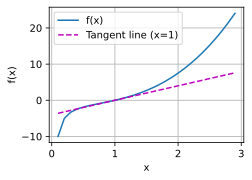

In [3]:
x = np.arange(0.1, 3, 0.1)
def f(x):
    return x ** 3 - 1 / x
d2l.plot(x, [f(x), 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])